<a href="https://colab.research.google.com/github/pillasandeep/FML/blob/main/K_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from sklearn.cluster import KMeans


In [9]:
df=pd.read_csv("data_pertanian_modern_fake.csv")
df.head()

,humidity,temperature,windspeed,precipitation,solar irradiance
0,2.961072,1.506010,2.533052,-2.156108,-0.476586
1,2.809125,0.956902,1.950795,0.269170,0.709486
2,2.711679,2.229877,2.329416,2.715768,-1.407908
3,1.524003,2.487360,1.865546,2.365030,-0.590172
4,0.460455,2.786802,1.430119,2.659718,-0.525686


In [10]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [11]:
df.shape

(500, 5)

In [18]:
scale=MinMaxScaler()
scale=scale.fit_transform(df[['humidity','windspeed']])
df_scale=pd.DataFrame(scale,columns=['humidity','windspeed'])
df_scale.head()

,humidity,windspeed
0,0.836282,0.764808
1,0.820998,0.659392
2,0.811195,0.727940
3,0.691725,0.643958
4,0.584740,0.565125


In [ ]:
K=range(2,10)
wss=[]
for k in K:
  kmeans=cluster.KMeans(n_clusters=k)
  kmeans=kmeans.fit(df_scale)
  wss_iter=kmeans.inertia_
  wss.append(wss_iter)

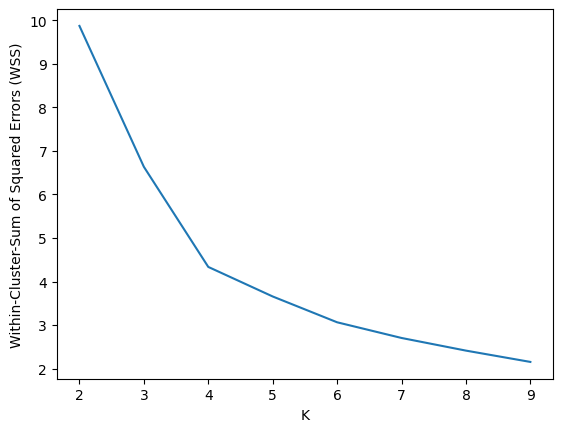

In [30]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

Applying kmeans with 4 clusters(k=4)

In [31]:
km=KMeans(n_clusters=4)
y_predicted=km.fit_predict(df_scale[['humidity','windspeed']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 3, 3, 3, 1, 0, 3, 1, 3, 0, 2, 3, 2, 1, 1, 3, 1, 1, 1, 2,
       2, 3, 3, 2, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 0, 1, 0, 3,
       3, 3, 1, 1, 3, 1, 2, 3, 3, 1, 3, 0, 3, 2, 0, 1, 2, 1, 3, 3, 0, 3,
       3, 3, 0, 0, 3, 1, 0, 3, 1, 2, 0, 2, 2, 2, 1, 3, 1, 3, 1, 1, 3, 0,
       2, 3, 3, 2, 1, 2, 1, 3, 1, 1, 3, 1, 3, 2, 3, 2, 0, 3, 1, 3, 1, 1,
       1, 3, 0, 1, 1, 2, 1, 2, 2, 0, 3, 1, 1, 3, 0, 1, 1, 1, 2, 0, 1, 3,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 3, 1, 1, 3, 3, 3, 2, 0, 1, 3, 2,
       3, 1, 3, 3, 1, 3, 1, 2, 0, 2, 1, 1, 3, 1, 2, 2, 0, 0, 3, 2, 2, 3,
       2, 1, 2, 2, 1, 1, 3, 0, 1, 1, 1, 3, 2, 1, 2, 1, 2, 0, 2, 2, 3, 3,
       3, 1, 3, 3, 2, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 2, 1, 2, 0, 2, 2, 3,
       1, 3, 3, 0, 1, 1, 0, 3, 2, 1, 1, 1, 3, 1, 1, 0, 1, 0, 1, 3, 3, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 3, 3, 3, 2, 3, 1, 0, 1, 1, 3, 0, 1, 2,
       2, 1, 1, 0, 3, 1, 2, 2, 3, 3, 1, 1, 0, 2, 2, 1, 1, 0, 0, 1, 1, 2,
       3, 0, 0, 3, 2, 3, 3, 1, 0, 3, 2, 3, 3, 3, 1,

<Axes: xlabel='humidity', ylabel='windspeed'>

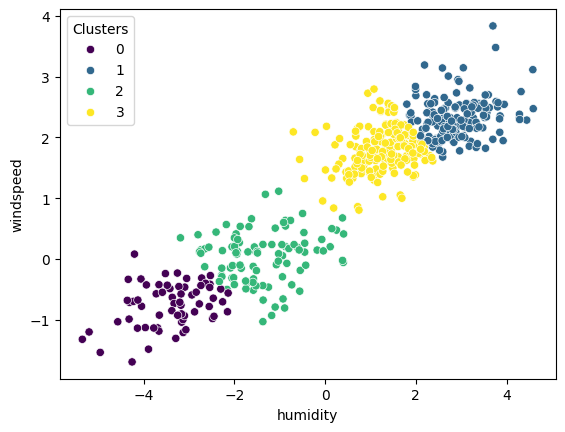

In [32]:
df['Clusters']=km.labels_
sns.scatterplot(x="humidity",y="windspeed",hue="Clusters",data=df,palette='viridis')
